In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt


# 1. 하이퍼 파라미터 지정

In [ ]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

# 2. Mnist 데이터 다운로드

In [ ]:
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 144137396.19it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 112684366.35it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 48675694.83it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 21747178.96it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



# 3. DataLoader 설정

In [ ]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

# 4. 모델 정의

In [ ]:
# 3-1. 오토인코더의 hidden layer에서 128개의 노드 수를 갖는 모델
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Linear(28*28, 128) #입력을 128개 노드로 압축
    self.decoder = nn.Linear(128, 28*28) #128개 노드를 다시 원래 크기로 확장

  def forward(self, x):
    x = x.view(batch_size, -1)
    encoded = self.encoder(x)
    out = self.decoder(encoded).view(batch_size,1,28,28)
    return out

# 5. 모델 구현 학습 및 결과 확인

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# 모델 지정 및 loss function, optimizer 선정
model = Autoencoder().to(device)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

cuda:0


In [ ]:
# 모델 학습
loss_arr = []
for i in range(num_epoch):
  for j, [image, label] in enumerate(train_loader):
    # 노이즈 추가
    noise = init.normal_(torch.FloatTensor(batch_size, 1, 28, 28), 0, 0.1)
    image = image + noise
    image = image.to(device)
    x = image.to(device)


    optimizer.zero_grad()
    output = model.forward(x)
    loss = loss_func(output, x)
    loss.backward()
    optimizer.step()

    if j % 1000 == 0:
      print(loss)
      loss_arr.append(loss.cpu().data.numpy())

tensor(0.1378, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0408, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0279, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0172, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0163, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0157, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0150, device='cuda:0', grad_fn=<MseLossBackward0>)


torch.Size([256, 28, 28])


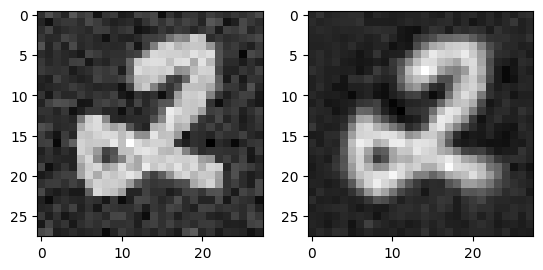

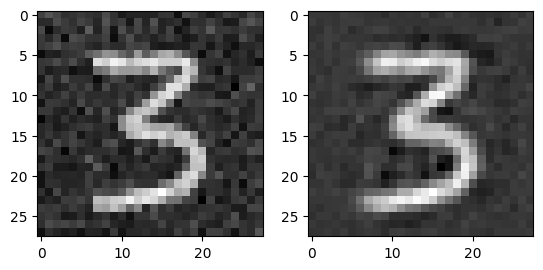

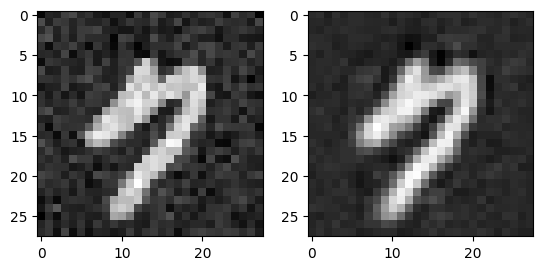

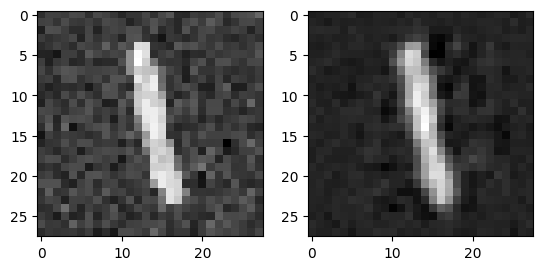

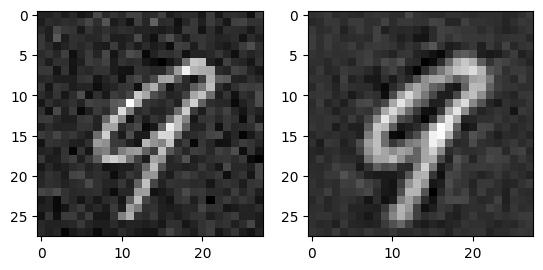

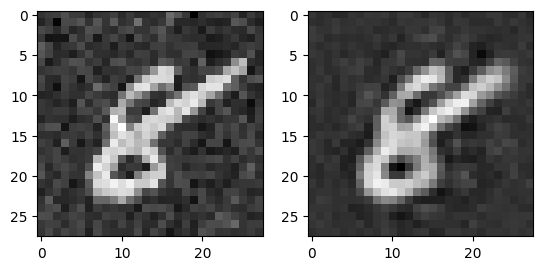

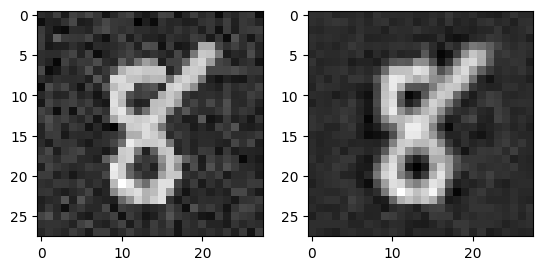

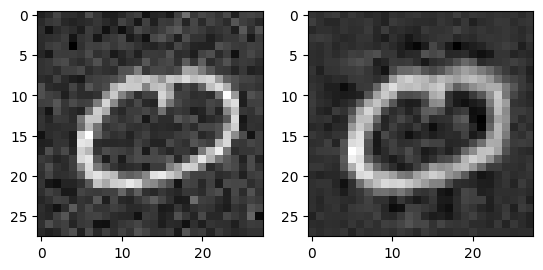

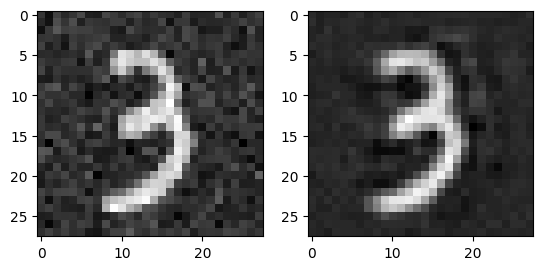

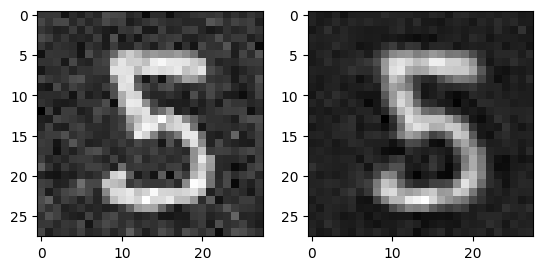

In [ ]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(10):
  plt.subplot(1,2,1)
  plt.imshow(torch.squeeze(image[i].cpu()).numpy(), cmap='gray')
  plt.subplot(1,2,2)
  plt.imshow(out_img[i].numpy(), cmap='gray')
  plt.show()

# 테스트 Prediction

In [ ]:
with torch.no_grad():
  for i in range(1):
    for j , [image,label] in enumerate(test_loader):
      x = image.to(device)

      optimizer.zero_grad()
      output = model.forward(x)

    if j % 1000 == 0:
      print(loss)

torch.Size([256, 28, 28])


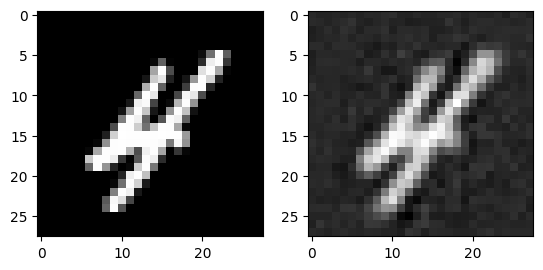

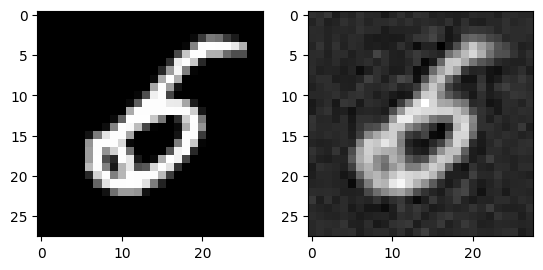

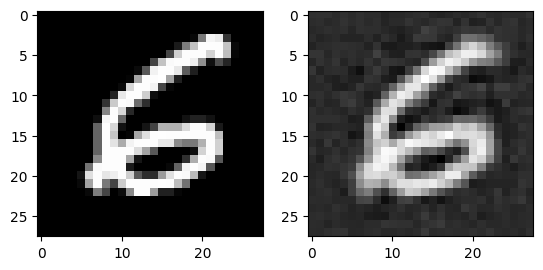

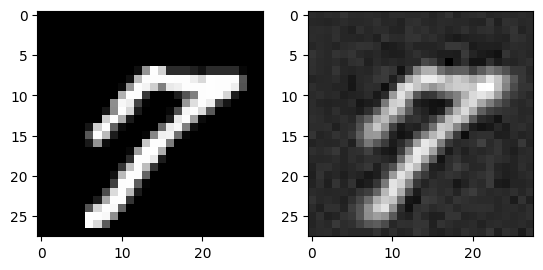

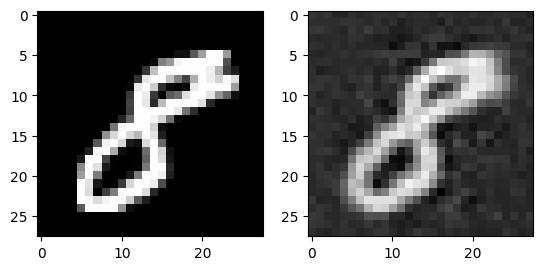

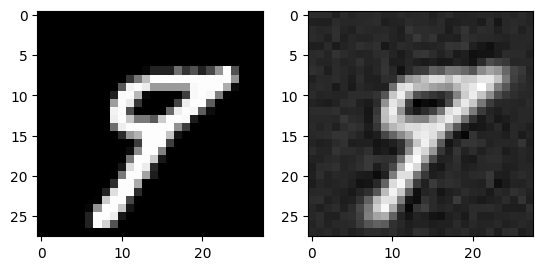

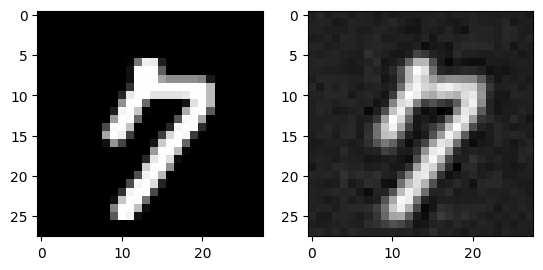

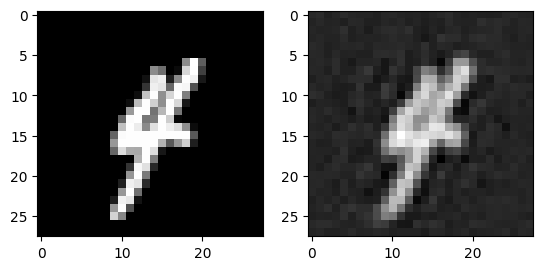

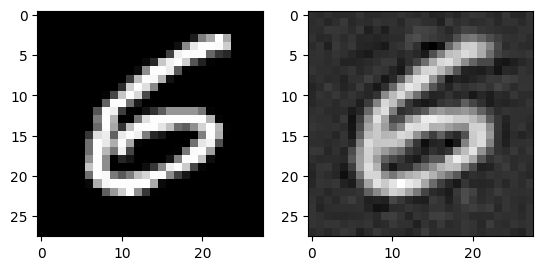

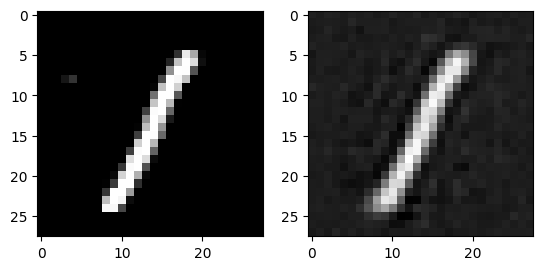

In [ ]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(10):
  plt.subplot(1,2,1)
  plt.imshow(torch.squeeze(image[i].cpu()).numpy(), cmap='gray')
  plt.subplot(1,2,2)
  plt.imshow(out_img[i].numpy(), cmap='gray')
  plt.show()